In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import math

from sklearn.decomposition import PCA

## Étape 1
### 1- Lecture des données

In [2]:
df = pd.read_excel("./autos-Saporta.xls", header=0, index_col=0)
display(df.head(50))
print(df.info())

,CYL,PUISS,LONG,LARG,POIDS,V.MAX
Modele,,,,,,
Alfasud TI,1350,79,393,161,870,165
Audi 100,1588,85,468,177,1110,160
Simca 1300,1294,68,424,168,1050,152
Citroen GS Club,1222,59,412,161,930,151
Fiat 132,1585,98,439,164,1105,165
Lancia Beta,1297,82,429,169,1080,160
Peugeot 504,1796,79,449,169,1160,154
Renault 16 TL,1565,55,424,163,1010,140
Renault 30,2664,128,452,173,1320,180


<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, Alfasud TI to Lada 1300
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   CYL     18 non-null     int64
 1   PUISS   18 non-null     int64
 2   LONG    18 non-null     int64
 3   LARG    18 non-null     int64
 4   POIDS   18 non-null     int64
 5   V.MAX   18 non-null     int64
dtypes: int64(6)
memory usage: 1008.0+ bytes
None


_Les 6 variables sont du type quantitative discrète._

### 2- Standardisation des données en vue d’une analyse ACP

In [3]:
scaler = preprocessing.StandardScaler()
standardized = scaler.fit_transform(df)
print(standardized.round(4))

[[-0.7751 -0.2834 -1.8851 -1.0973 -1.569   0.5698]
 [-0.1202  0.0196  1.6058  2.001   0.2342  0.146 ]
 [-0.9292 -0.8389 -0.4422  0.2582 -0.2166 -0.5321]
 [-1.1273 -1.2933 -1.0007 -1.0973 -1.1182 -0.6168]
 [-0.1284  0.6761  0.256  -0.5164  0.1966  0.5698]
 [-0.9209 -0.1319 -0.2095  0.4518  0.0088  0.146 ]
 [ 0.4522 -0.2834  0.7215  0.4518  0.6098 -0.3626]
 [-0.1835 -1.4953 -0.4422 -0.71   -0.5172 -1.5492]
 [ 2.8408  2.1911  0.8611  1.2264  1.8119  1.8411]
 [-1.2814 -1.4953 -1.6058 -1.8719 -1.9822 -1.5492]
 [-0.1697  1.2316 -0.256  -0.9037 -0.1415  1.4173]
 [ 0.4577 -0.1319  0.5353  1.0328  0.6098 -0.0235]
 [ 1.0081  1.5346  1.6524  0.4518  2.1876  0.146 ]
 [ 0.9943  0.6761  0.2095  0.6455  0.0088  0.7393]
 [-0.5219 -0.2329 -0.1164 -0.1291  0.3769 -1.2102]
 [ 0.3779 -0.0814  0.3025 -0.3227  0.1215  0.5698]
 [ 0.9558  0.7771  1.1869  1.2264  0.3093  1.2478]
 [-0.9292 -0.8389 -1.3731 -1.0973 -0.9304 -1.5492]]


### 3- Vérification que les données sont centrées et réduites

In [4]:
print("Les moyennes des variables:\n", np.mean(standardized, axis = 0).round(3))
print("Les écarts types des variables\n", np.std(standardized, axis=0))

Les moyennes des variables:
 [-0. -0.  0.  0.  0.  0.]
Les écarts types des variables
 [1. 1. 1. 1. 1. 1.]


## Étape 2
### 1- Calcul de la matrice de corrélation des variables

In [5]:
corr_matrix = np.corrcoef(standardized.T)
display(corr_matrix.round(3))

array([[1.   , 0.797, 0.701, 0.63 , 0.789, 0.665],
       [0.797, 1.   , 0.641, 0.521, 0.765, 0.844],
       [0.701, 0.641, 1.   , 0.849, 0.868, 0.476],
       [0.63 , 0.521, 0.849, 1.   , 0.717, 0.473],
       [0.789, 0.765, 0.868, 0.717, 1.   , 0.478],
       [0.665, 0.844, 0.476, 0.473, 0.478, 1.   ]])

### 2-3-4 Calcul de valeurs propres de la matrice de corrélation, somme des valeurs propres et calcul de la proportion de variance expliquée

In [6]:
eigen_values, eigen_vectors = np.linalg.eig(corr_matrix)
print("Eigenvectors: \n",eigen_vectors.round(3),"\n")
print("Eigenvalues: \n", eigen_values, "\n")

sum_eigen_values = sum(eigen_values)
print("Somme des valeurs propres:", sum_eigen_values, "\n")
props = list(map(lambda ev: ev / sum_eigen_values, eigen_values))
print("Proportion de variance expliquée:\n" + str(props))

Eigenvectors: 
 [[-0.425 -0.124 -0.354  0.808  0.152 -0.059]
 [-0.422 -0.416 -0.185 -0.358 -0.294 -0.633]
 [-0.421  0.412  0.068 -0.28   0.731 -0.19 ]
 [-0.387  0.446  0.605  0.212 -0.478 -0.11 ]
 [-0.431  0.243 -0.484 -0.302 -0.305  0.581]
 [-0.359 -0.62   0.485 -0.074  0.189  0.459]] 

Eigenvalues: 
 [4.42085806 0.85606229 0.37306608 0.21392209 0.09280121 0.04329027] 

Somme des valeurs propres: 5.999999999999997 

Proportion de variance expliquée:
[0.7368096766014814, 0.14267704820766, 0.06217767957332889, 0.03565368150388502, 0.015466868667654747, 0.0072150454459900485]


### 5- Détermination du nombre d’axes à retenir en utilisant le critère de coude

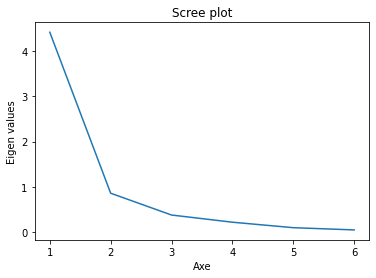

In [7]:
plt.plot(np.arange(1,len(df.columns) + 1),eigen_values)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Axe")
plt.show()

_On voit qu'à partir de 2 axes, il n'y a plus vraiment de gain dans l'explication de la variance; le coude se situe à 2 axes._

### 6- Réalisation d'une  ACP

In [8]:
acp = PCA(svd_solver='full')
C = acp.fit_transform(standardized)
n_component = acp.n_components_

print("Coordonées des individus dans l'espace factoriel:", C.round(3), "\n")
print("Nombre de composantes principales:", n_component, "\n")
print("Variance expliquée:", acp.explained_variance_, "\n")
print("Part de la variance expliquée:", acp.explained_variance_ratio_)

Coordonées des individus dans l'espace factoriel: [[-2.139  1.786  0.572  0.202 -0.301  0.054]
 [ 1.561 -1.527  1.315 -0.211  0.149 -0.327]
 [-1.119 -0.675  0.457 -0.168 -0.375  0.272]
 [-2.574  0.113  0.149 -0.017  0.227  0.263]
 [ 0.428  0.696 -0.193 -0.628  0.264 -0.037]
 [-0.304 -0.196  0.676 -0.556 -0.445  0.2  ]
 [ 0.684 -0.933 -0.257  0.203  0.209  0.154]
 [-1.948 -0.98  -0.62   0.63   0.293  0.109]
 [ 4.41   1.064 -0.594  0.847 -0.375  0.044]
 [-3.986  0.236 -0.303  0.265  0.278 -0.329]
 [ 0.438  1.912  0.025 -0.759  0.168 -0.054]
 [ 1.018 -0.842  0.217  0.303 -0.185  0.185]
 [ 2.941 -0.559 -1.244 -0.772  0.054 -0.057]
 [ 1.315  0.487  0.283  0.582 -0.067 -0.253]
 [-0.691 -0.898 -0.628 -0.358 -0.377 -0.122]
 [ 0.386  0.356 -0.076  0.103  0.527  0.339]
 [ 2.29   0.104  0.796  0.236  0.338 -0.157]
 [-2.709 -0.144 -0.574  0.096 -0.382 -0.283]] 

Nombre de composantes principales: 6 

Variance expliquée: [4.68090853 0.90641889 0.39501114 0.22650574 0.09826011 0.04583676] 

Part de 

_Les eigen values ne sont pas exactement les mêmes, mais restent proches. Par contre, les part de variances expliquées sont les mêmes ainsi que le nombre d'axes._

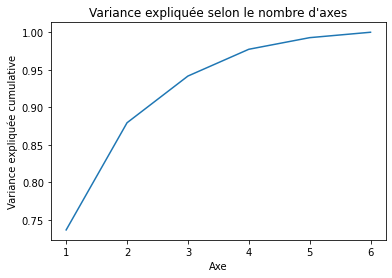

In [9]:
plt.plot(np.arange(1,len(df.columns) + 1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Variance expliquée selon le nombre d'axes")
plt.ylabel("Variance expliquée cumulative")
plt.xlabel("Axe")
plt.show()

### -7 Projection des individus sur les deux premières composantes principales

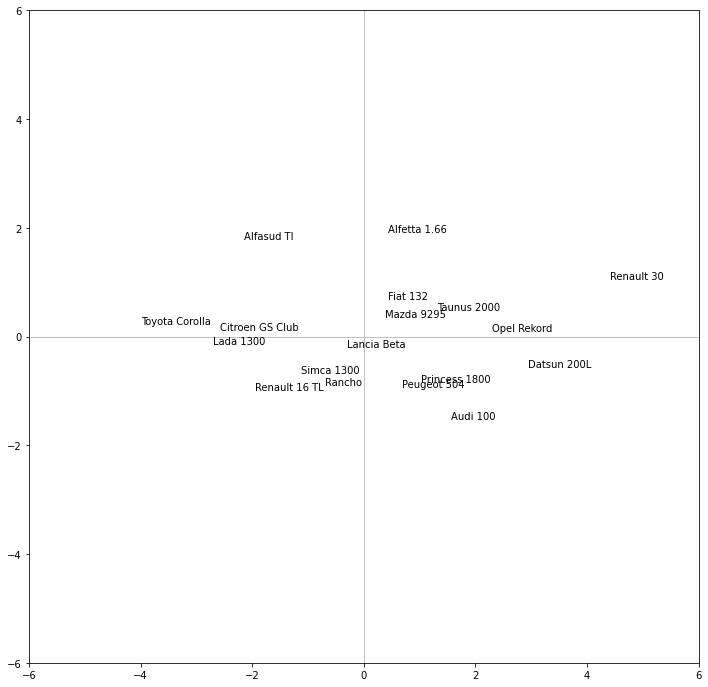

In [10]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée

#placement des étiquettes des observations
for i in range((df.shape[0])):
 # i correspond à la ligne, 0 à la cp1 et 1 à la cp2
 plt.annotate(df.index[i],(C[i,0],C[i,1]))

#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

plt.show()

_L'ACP nous permet de réduire la dimensionalité et ainsi pouvoir visualier le regroupement des individus. C'est-à-dire qu'on analyse la typologie des individus. Ainsi, sur le graphique ci-haut, on peut voir que sur l'axe principal (x), `Renaut 30` et `Toyota Corolla` sont à l'opposée, ce qui veut dire qu'elles sont éloignées en termes de ressemblance. C'est moins le cas par contre si on les compare selon la $2^e$ composante principale. En effet, dans cette visualisation, il s'agit plutôt de `Alfetta 1.66` et `Audi 100` qui sont les plus éloingées. Par contre, on ne sait pas à quoi est dû cette différence._